<h1>Image Classification</h1>

This notebook develops code for a multiclass classificaction problem based on the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset following the text [Hands-On Machine Learning](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

The dataset contains images of handwritten digits, and the goal is to classify this images into 10 classses, corresponding to the digits 0 through 9.

The data is loaded using sklearn.

<h3>Libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y = y.astype(np.uint8)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

We have 70.000 images, each image has 784 features, this is because the original 28x28 pixels of each image are flatten to a 784-dimensional vector. Is important to note that that each pixel ranges from 0(white) to 255(black).

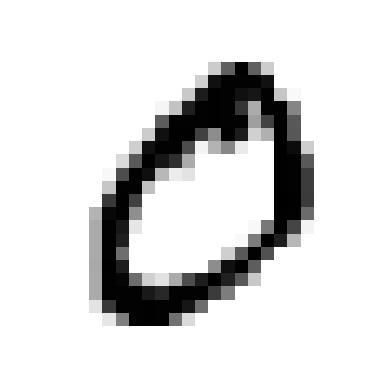

0

In [5]:
exmpl_data = X.iloc[1]
exmpl_data_reshaped = exmpl_data.values.reshape(28, 28)
plt.imshow(exmpl_data_reshaped, cmap=plt.cm.binary)
plt.axis("off")
plt.show()
y[1]

The label correspond to the image.

<h3>Train-Test Split</h3>
The dataset is already shuffled and the first 60.000 images are used for training, the remaining images are used for testing.

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<h3>Training</h3>
Initially we are going to make a classifier that only detects if an image is a zero or not a zero. The model is going to be a Stochastic Gradient Descent (SGD) classifier.

In [7]:
y_train_0 = y_train == 0
y_test_0 = y_test == 0



In [11]:
sgdc=SGDClassifier(random_state=0)
sgdc.fit(X_train, y_train_0)

SGDClassifier(random_state=0)

Now we use the example showed before to see what the model predicts.

In [12]:
sgdc.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

The prediction is correct.
<h3>Scoring</h3>

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgdc,X_train,y_train_0,cv=3,scoring='accuracy')

array([0.98895, 0.9878 , 0.9858 ])

The accuracy is above 98%, that's because the dataset is skewed.

Text(0, 0.5, '')

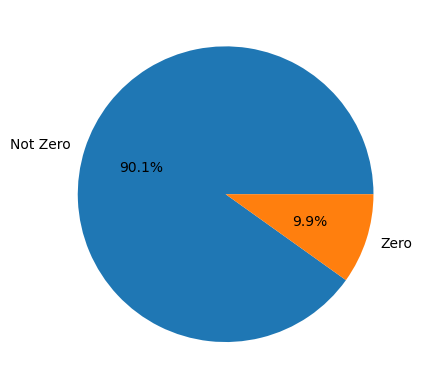

In [33]:
y_train_0.value_counts().plot.pie(labels=['Not Zero','Zero'],autopct='%1.1f%%')
plt.ylabel('')

Let's use a better performance metric such as Confusion Matrix

In [34]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgdc, X_train, y_train_0, cv=3)
y_train_pred

array([False,  True, False, ..., False, False, False])

In [35]:
y_train_pred.shape

(60000,)